# Exercise 4: Loan Prediction Practice Problem

## Position In Leaderboard: 962 Score: 0.777778

![leaderboard](https://github.com/zamiramos/ex4/blob/master/Submission2.PNG)

## Username: antomis

Based on this great tutorial: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

From the challange hosted at: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

The company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## The Data

Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)


Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.

You may upload the solution in the format of "sample_submission.csv"

## Setups

To begin, start iPython interface in Inline Pylab mode by typing following on your terminal / windows command prompt:

In [71]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['table', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Following are the libraries we will use during this task:
- numpy
- matplotlib
- pandas

Please note that you do not need to import matplotlib and numpy because of Pylab environment. I have still kept them in the code, in case you use the code in a different environment.

In [72]:
import pandas as pd
import numpy as np
import matplotlib as plt

After importing the library, you read the dataset using function read_csv(). The file is assumed to be downloaded from the moodle to the data folder in your working directory.

In [73]:
df = pd.read_csv("./data/train.csv") #Reading the dataset in a dataframe using Pandas

## Let’s begin with exploration

### Quick Data Exploration

Once you have read the dataset, you can have a look at few top rows by using the function head()

In [74]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


This should print 10 rows. Alternately, you can also look at more rows by printing the dataset.

Next, you can look at summary of numerical fields by using describe() function

In [75]:
df.describe() # get the summary of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


describe() function would provide count, mean, standard deviation (std), min, quartiles and max in its output

## Distribution analysis

Now that we are familiar with basic data characteristics, let us study distribution of various variables. Let us start with numeric variables – namely ApplicantIncome and LoanAmount

Lets start by plotting the histogram of ApplicantIncome using the following commands:

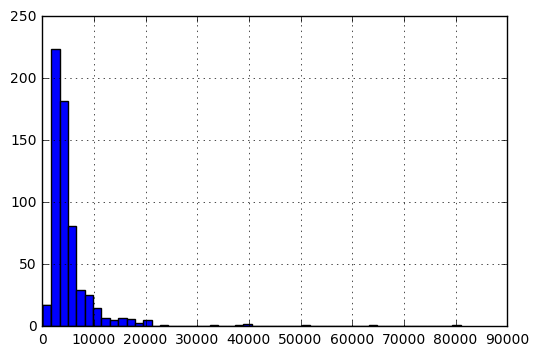

In [76]:
df['ApplicantIncome'].hist(bins=50)

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

Next, we look at box plots to understand the distributions. Box plot can be plotted by:

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x113d4e10>],
 'caps': [<matplotlib.lines.Line2D at 0x113e3c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x113eecf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x113ee780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10fe3160>,
  <matplotlib.lines.Line2D at 0x113e36d8>]}

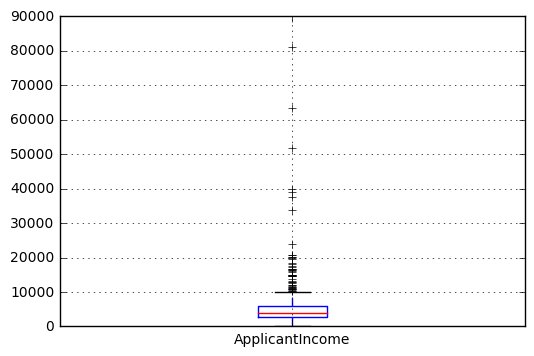

In [77]:
df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

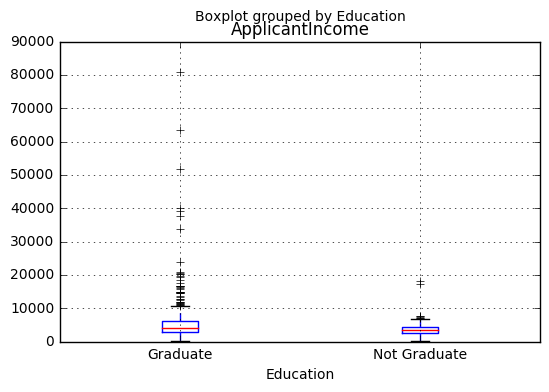

In [78]:
df.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

# Task 2: Distribution Analysis

Plot the histogram and boxplot of LoanAmount

## Check yourself:

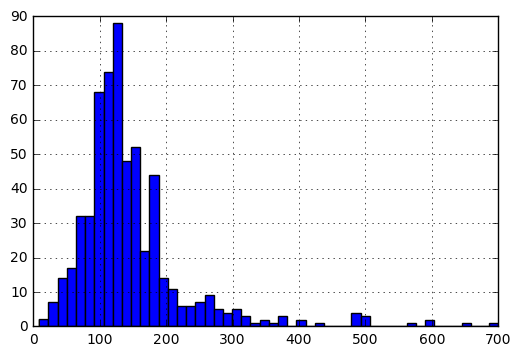

In [79]:
df['LoanAmount'].hist(bins=50)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11d463c8>],
 'caps': [<matplotlib.lines.Line2D at 0x11d58278>,
 'fliers': [<matplotlib.lines.Line2D at 0x11d64320>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11d58d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x118e60f0>,
  <matplotlib.lines.Line2D at 0x11d46cc0>]}

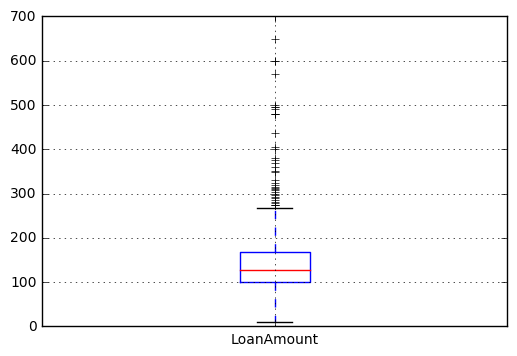

In [80]:
df.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding. We will take this up in coming sections.

## Categorical variable analysis

Frequency Table for Credit History:

In [81]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:

In [82]:
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp2

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

This can be plotted as a bar chart using the “matplotlib” library with following code:

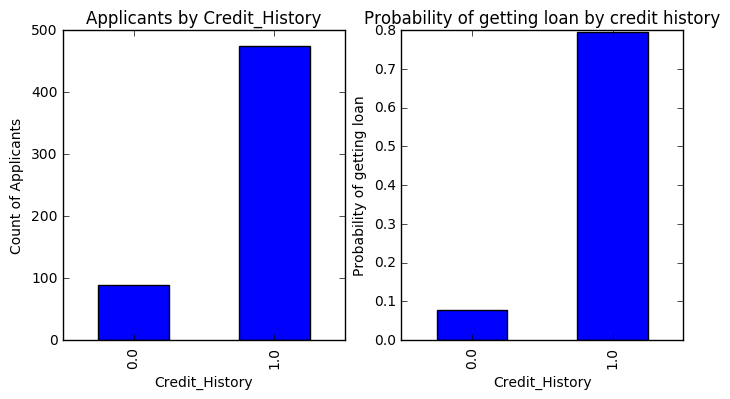

In [83]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. You can plot similar graphs by Married, Self-Employed, Property_Area, etc.

Alternately, these two plots can also be visualized by combining them in a stacked chart::

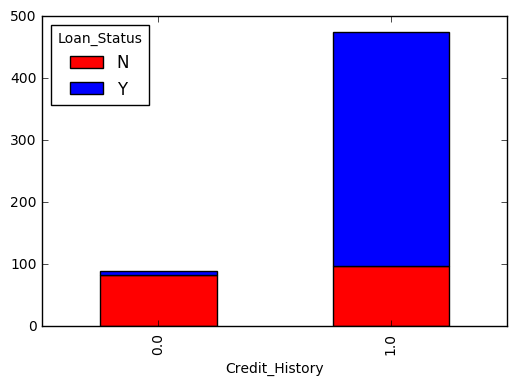

In [84]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

We just saw how we can do exploratory analysis in Python using Pandas. I hope your love for pandas (the animal) would have increased by now – given the amount of help, the library can provide you in analyzing datasets.

Next let’s explore ApplicantIncome and LoanStatus variables further, perform data munging and create a dataset for applying various modeling techniques. I would strongly urge that you take another dataset and problem and go through an independent example before reading further.

## Function For Building Model

In [85]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  #print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  #print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
  
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])
  return {'accuracy':accuracy ,'cv':np.mean(error)}

## How to fill missing values in LoanAmount?


How to fill missing values in LoanAmount?

There are numerous ways to fill the missing values of loan amount – the simplest being replacement by mean, which can be done by following code:


In [86]:
# df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

The other extreme could be to build a supervised learning model to predict loan amount on the basis of other variables and then use age along with other variables to predict survival.

Since, the purpose now is to bring out the steps in data munging, I’ll rather take an approach, which lies some where in between these 2 extremes. A key hypothesis is that whether a person is educated or self-employed can combine to give a good estimate of loan amount.

But first, we have to ensure that each of Self_Employed and Education variables should not have a missing values.

As we say earlier, Self_Employed has some missing values. Let’s look at the frequency table:

In [87]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. This can be done using the following code:

In [88]:
df['Self_Employed'].fillna('No',inplace=True)

Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount:

In [89]:
tableLoanAmount = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
tableLoanAmount

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


Define function to return value of this pivot_table:

In [90]:
def fage(x):
 return tableLoanAmount.loc[x['Self_Employed'],x['Education']]

Replace missing values:

In [91]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

This should provide you a good way to impute missing values of loan amount.

## How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

Let’s analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

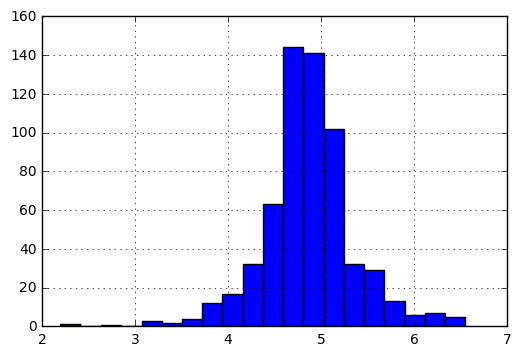

In [92]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

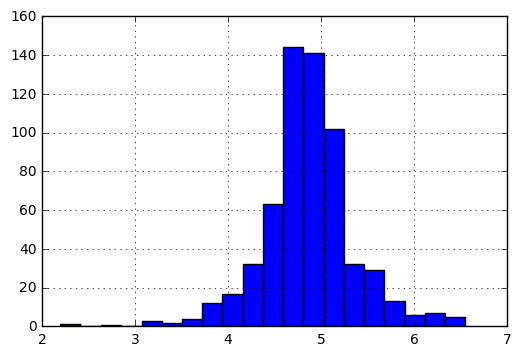

In [93]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

Now we see that the distribution is much better than before. 

# Submission 1

## Feature Engineering

### Fill missing Values

Let us look at missing values in all the variables.

In [94]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

I build a generic function to predict categorical features. It will fill the NA values based on other records.

In [95]:
from sklearn.preprocessing import LabelEncoder

def fill_na_by_predication(model, data,predictors,outcome):    
    #first convert the datatype
    data_correct_types = data.copy()
    var_mod = list(predictors)
    var_mod.append(outcome)
    le = LabelEncoder()
    for i in var_mod:
        data_correct_types[i] = le.fit_transform(data_correct_types[i].astype(str))
    
    #Fit the model:
    outcomeNansMask = data[outcome].isnull()
    
    #check if there are NA values
    if not (outcomeNansMask == True).any():
        return
    
    model.fit(data_correct_types[predictors][~outcomeNansMask],data_correct_types[outcome][~outcomeNansMask])
    
    #Make predictions on training set:
    predictions = model.predict(data_correct_types[predictors][~outcomeNansMask])
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data_correct_types[outcome][~outcomeNansMask])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    predictionsOutcomeNans = model.predict(data_correct_types[predictors][outcomeNansMask])
    
    predictionsOutcomeNans = le.inverse_transform(predictionsOutcomeNans)
    
    resultDFPredication = pd.DataFrame(predictionsOutcomeNans, columns=[outcome], index=data[outcomeNansMask].index)
    
    #print(pd.concat([resultDFPredication, data[outcome][~outcomeNansMask]], axis=1)[outcomeNansMask])
    #print(resultDFPredication.loc[104])
    
    #print(predictionsOutcomeNans[:,1])
    #print(pd.concat([data['Loan_ID'][outcomeNansMask], pd.DataFrame(predictionsOutcomeNans, columns=[outcome], index=outcomeNansMask)] ,axis=1))
    
    #data[data[outcome].isnull()].apply(lambda x: resultDFPredication.loc[x.name], axis=1)
    
    data[outcome].fillna(data[data[outcome].isnull()].apply(lambda x: resultDFPredication.loc[x.name][outcome], axis=1), inplace=True)
    
    #data[outcome][outcomeNansMask] = resultDFPredication

#### Fill Married

Let's fill na of Married Catagory by looking on Education, Dependents, ApplicantIncome, Gender, Property_Area.

In [96]:
outcome_var = 'Married'
modelFillMarried = DecisionTreeClassifier()
predictor_var = ['Education','ApplicantIncome','Gender','Property_Area']

fill_na_by_predication(modelFillMarried, df,predictor_var,outcome_var)

Accuracy : 98.200%


#### Fill Gender

Let's check the connection between Education and Gender.

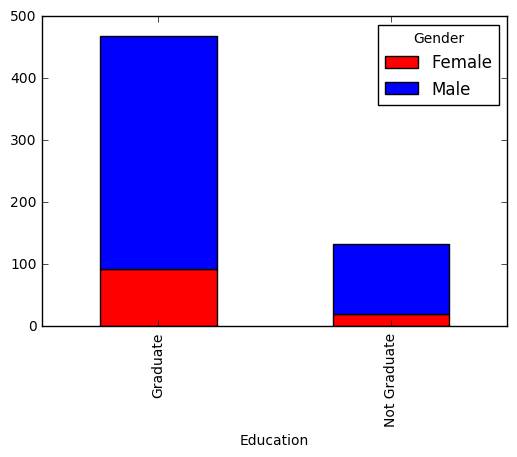

In [97]:
temp3 = pd.crosstab(df['Education'], df['Gender'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [98]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

We can see that the ratio is not significantly changed.

Let's check the connection between ApplicantIncome and Gender.

In [99]:
table = df.pivot_table(values='LoanAmount', index='Gender', aggfunc=np.mean)
table

Gender
Female    126.879464
Male      148.421268
Name: LoanAmount, dtype: float64

We can see that LoanAmount can direct on the gender.

Let's check the connection between Married and Gender.

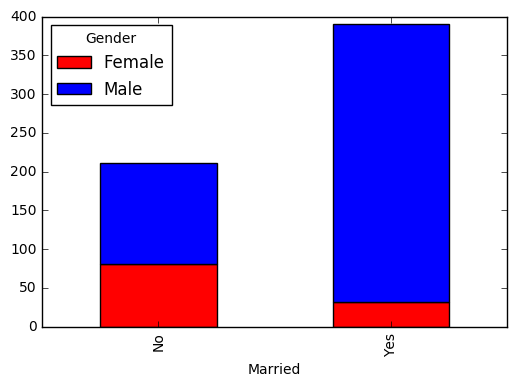

In [100]:
temp3 = pd.crosstab(df['Married'], df['Gender'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

When the applicant person is married, in most of the cases the gender will be male.

Let's check the connection between Property_Area and Gender. 

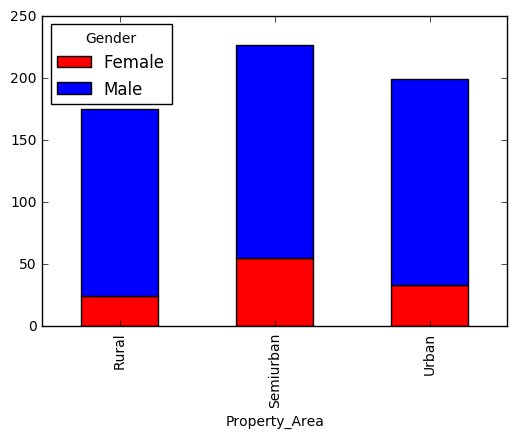

In [101]:
temp3 = pd.crosstab(df['Property_Area'], df['Gender'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Here we see that there is a little tilt in each Property_Area categorial againt the gender ratio.

Let's check the connection between Dependents and Gender. 

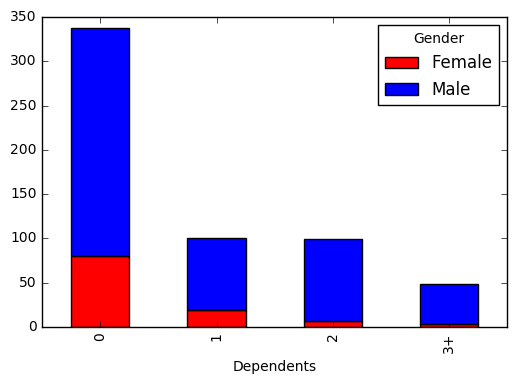

In [102]:
temp3 = pd.crosstab(df['Dependents'], df['Gender'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Here we see that above 2 Dependents most likely to be Male. 

Now taking all those conclusion, we will predict all our NA values using Dependents, Property_Area, Married, LoanAmount.

In [103]:
outcome_var = 'Gender'
modelFillGender = DecisionTreeClassifier()
predictor_var = ['Dependents','Married','LoanAmount','Property_Area']

fill_na_by_predication(modelFillGender, df,predictor_var,outcome_var)

Accuracy : 95.840%


#### Fill Credit_History

We see from above that we have a lot of missing values in Credit_History catagory. Let's print again the Credit_History againt Loan Status.

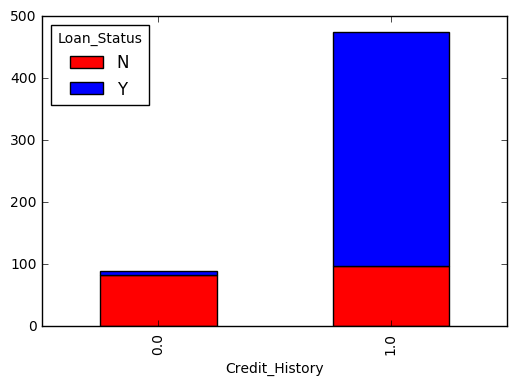

In [104]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

We can see that if there is no credit_history the chances to get loan is very low, and the opposite if we have.

If we will fill the missing values to one of those values then we will get alot of false postive, or postive false. 
I think that the best option is to open a new catogary, let's say 2, which say that the history is unknown.

In [105]:
df['Credit_History_Unknown'] = df['Credit_History'].fillna(2.0)

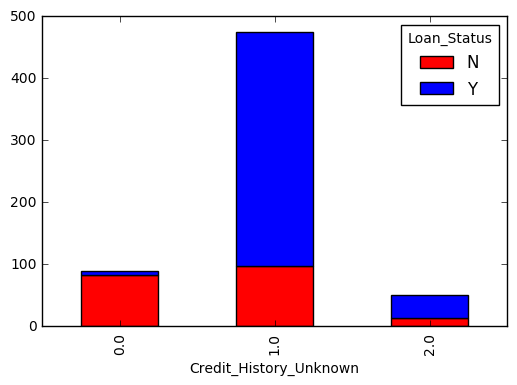

In [106]:
temp3 = pd.crosstab(df['Credit_History_Unknown'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

#### Dependents

We already saw that there is a connection between Dependents and Gender. Let's search other connection for the predection.

Lets explore other connection, Dependents and Property_Area.

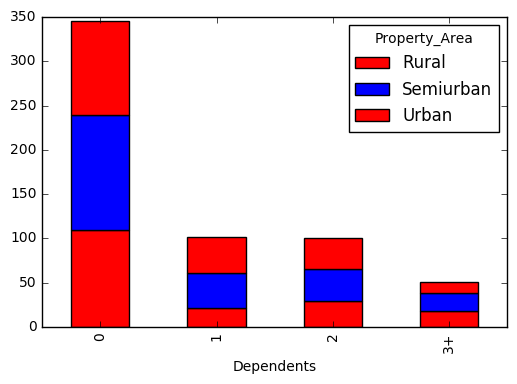

In [107]:
temp3 = pd.crosstab(df['Dependents'], df['Property_Area'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

We don't see here tilt to some categorial.

In [108]:
table = df.pivot_table(values='TotalIncome', index='Dependents', aggfunc=np.mean)
table

Dependents
0      6541.119188
1      7388.509804
2      6614.027723
3+    10605.529412
Name: TotalIncome, dtype: float64

Here we see a good connection.

Lets check the connection between the Loan_Amount_Term and Dependents.

In [109]:
table = df.pivot_table(values='Loan_Amount_Term', index='Dependents', aggfunc=np.mean)
table

Dependents
0     348.107784
1     329.346535
2     340.871287
3+    325.200000
Name: Loan_Amount_Term, dtype: float64

Also here we can see that mean is little diffrent releated to Dependents.

Now taking all those conclusion, we will predict all our NA values using Loan_Amount_Term, LoanAmount, Gender.

In [110]:
outcome_var = 'Dependents'
modelFillDependents = DecisionTreeClassifier()
predictor_var = ['TotalIncome','Loan_Amount_Term','Gender']

fill_na_by_predication(modelFillDependents, df,predictor_var,outcome_var)

Accuracy : 98.164%


#### Loan_Amount_Term

Lets fill Loan_Amount_Term with mean median value of 360

In [111]:
df['Loan_Amount_Term'].fillna(360, inplace=True)

## Algorithm Description

VotingClassifier - Soft Voting/Majority Rule classifier built from:

1. An extra-trees classifier.
This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

2. LogisticRegression classifier.
This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied).




## Algorithm Calibration

First use encoder to convert catagorial features to scalar.

In [112]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
datasetLe = LabelEncoder()
for i in var_mod:
    df[i] = datasetLe.fit_transform(df[i].astype(str))

Check Types

In [113]:
df.dtypes

Loan_ID                    object
Gender                      int64
Married                     int64
Dependents                  int64
Education                   int64
Self_Employed               int64
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area               int64
Loan_Status                 int64
LoanAmount_log            float64
TotalIncome               float64
TotalIncome_log           float64
Credit_History_Unknown    float64
dtype: object

Define the range of the paramters we want to estimate

In [114]:
#number of trees
n_estimators_vector = range(100, 1000, 200)

#Minmum split
min_samples_split_vector = range(20, 31, 5)

#Maximum Features
max_features_vector = range(2, 4, 1)

In [115]:
from sklearn.ensemble import ExtraTreesClassifier

resultCalibrationDF = pd.DataFrame(columns = ['n_estimators', 'min_samples_split', 'max_features','Accuracy', 'Cross-Validation Score'])

outcome_var = 'Loan_Status'
predictor_var = ['Gender','Married','Dependents','Education', 'Self_Employed', 'TotalIncome_log', 'LoanAmount_log', 'Property_Area']

#train the model
for n_estimator in n_estimators_vector:
    for min_samples_split in min_samples_split_vector:
        for max_features in max_features_vector:
            model_etc = ExtraTreesClassifier(n_estimators=n_estimator, min_samples_split=min_samples_split, max_depth=None, max_features=max_features)
            result = classification_model(model_etc, df,predictor_var,outcome_var)
            #insert result to data frame
            resultCalibrationDF = resultCalibrationDF.append({'n_estimators':n_estimator,'min_samples_split':min_samples_split,'max_features':max_features, 'Accuracy':result['accuracy'], 'Cross-Validation Score':result['cv']}, ignore_index=True)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013AC10F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000141BA080>], dtype=object)

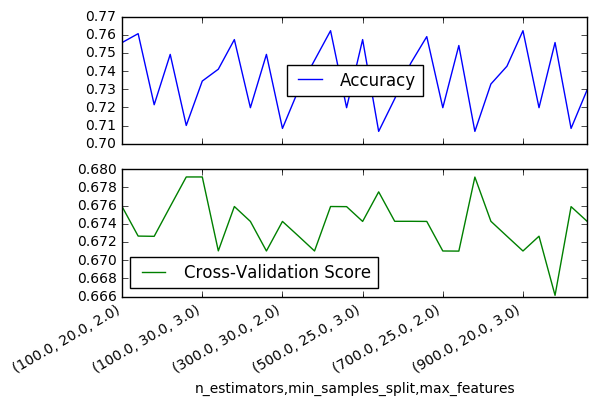

In [116]:
resultCalibrationDF.plot(x=['n_estimators', 'min_samples_split', 'max_features'], y= ['Accuracy','Cross-Validation Score'], legend = True, subplots = True)

We can see that the best combination is n_estimators:500 min_samples_split:25 max_features:3
Lets train our model for this specific paramters:

In [117]:
model_etc = ExtraTreesClassifier(n_estimators=500, min_samples_split=25, max_depth=None, max_features=3)
result = classification_model(model_etc, df,predictor_var,outcome_var)
print("Accuracy : %s" % "{0:.3%}".format(result['accuracy']))
print("Cross-Validation Score : %s" % "{0:.3%}".format(result['cv']))

Accuracy : 75.081%
Cross-Validation Score : 67.100%


I want now to create a simple model only for the dominant feature 'Credit_History'

In [118]:
outcome_var = 'Loan_Status'
model_credit_history = LogisticRegression()
predictor_var = ['Credit_History_Unknown','LoanAmount_log']
result = classification_model(model_credit_history, df,predictor_var,outcome_var)
print("Accuracy : %s" % "{0:.3%}".format(result['accuracy']))
print("Cross-Validation Score : %s" % "{0:.3%}".format(result['cv']))

Accuracy : 80.945%
Cross-Validation Score : 80.946%


Ensemble between the model.

In [119]:
from sklearn.ensemble import VotingClassifier

modelEnsemble = VotingClassifier(estimators=[('lr', model_credit_history), ('etc', model_etc)], voting='hard')
predictor_var = ['Gender','Married','Dependents','Education', 'Self_Employed', 'TotalIncome_log', 'LoanAmount_log', 'Property_Area','Credit_History_Unknown'] 
result = classification_model(modelEnsemble, df,predictor_var,outcome_var)
print("Accuracy : %s" % "{0:.3%}".format(result['accuracy']))
print("Cross-Validation Score : %s" % "{0:.3%}".format(result['cv']))

Accuracy : 82.736%
Cross-Validation Score : 80.296%


## Prepare Test Data

In [120]:
testDF = pd.read_csv("./data/test.csv") #Reading the test dataset in a dataframe using Pandas

Let us look at missing values in all the variables.

In [121]:
 testDF.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Fill the data with the same logic as we analyzed the training dataset

#### Gender

In [122]:
from sklearn.preprocessing import LabelEncoder

def fill_na_by_predication_without_training(model, data,predictors,outcome):    
    #first convert the datatype
    data_correct_types = data.copy()
    var_mod = list(predictors)
    var_mod.append(outcome)
    le = LabelEncoder()
    for i in var_mod:
        data_correct_types[i] = le.fit_transform(data_correct_types[i].astype(str))
    
    #Fit the model:
    outcomeNansMask = data[outcome].isnull()
    
    #check if there are NA values
    if not (outcomeNansMask == True).any():
        print('NA values not found')
        return
    
    predictionsOutcomeNans = model.predict(data_correct_types[predictors][outcomeNansMask])
    
    predictionsOutcomeNans = le.inverse_transform(predictionsOutcomeNans)
    
    resultDFPredication = pd.DataFrame(predictionsOutcomeNans, columns=[outcome], index=data[outcomeNansMask].index)
    
    #print(pd.concat([resultDFPredication, data[outcome][~outcomeNansMask]], axis=1)[outcomeNansMask])
    #print(resultDFPredication.loc[104])
    
    #print(predictionsOutcomeNans[:,1])
    #print(pd.concat([data['Loan_ID'][outcomeNansMask], pd.DataFrame(predictionsOutcomeNans, columns=[outcome], index=outcomeNansMask)] ,axis=1))
    
    #data[data[outcome].isnull()].apply(lambda x: resultDFPredication.loc[x.name], axis=1)
    
    data[outcome].fillna(data[data[outcome].isnull()].apply(lambda x: resultDFPredication.loc[x.name][outcome], axis=1), inplace=True)
    
    print('NA values successfuly filled')
    
    #data[outcome][outcomeNansMask] = resultDFPredication

In [123]:
outcome_var = 'Gender'
predictor_var = ['Dependents','Married','LoanAmount','Property_Area']

fill_na_by_predication_without_training(modelFillGender, testDF,predictor_var,outcome_var)

NA values successfuly filled


#### Fill Credit_History

In [124]:
testDF['Credit_History_Unknown'] = testDF['Credit_History'].fillna(2.0)

#### Fill Self_Employed

In [125]:
testDF['Self_Employed'].fillna('No',inplace=True)

#### Fill LoanAmount / TotalIncome / LoanAmount_log / TotalIncome_log

In [126]:
testDF['LoanAmount'].fillna(testDF[testDF['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)
testDF['LoanAmount_log'] = np.log(testDF['LoanAmount'])
testDF['TotalIncome'] = testDF['ApplicantIncome'] + testDF['CoapplicantIncome']
testDF['TotalIncome_log'] = np.log(testDF['TotalIncome'])

#### Fill Dependents

In [127]:
outcome_var = 'Dependents'
predictor_var = ['TotalIncome','Loan_Amount_Term','Gender']

fill_na_by_predication_without_training(modelFillDependents, testDF,predictor_var,outcome_var)

NA values successfuly filled


## Predict Test Dataset

First use encoder to convert catagorial features to scalar.

In [128]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    testDF[i] = le.fit_transform(testDF[i].astype(str))

Finally Predict:

In [129]:
predictor_var = ['Gender','Married','Dependents','Education', 'Self_Employed', 'TotalIncome_log', 'LoanAmount_log', 'Property_Area','Credit_History_Unknown'] 
testVectorPrediction = modelEnsemble.predict(testDF[predictor_var])
testVectorPrediction = datasetLe.inverse_transform(testVectorPrediction)
testDFPrediction = pd.DataFrame(testVectorPrediction, columns=['Loan_Status'], index=testDF['Loan_ID'].index)
finalResultsDF = pd.concat([testDF['Loan_ID'], testDFPrediction], axis=1)

In [130]:
#export to csv
finalResultsDF.to_csv(path_or_buf="./data/Submission1.csv", index=False)

## Link To Submission File
[Submission1-Link](https://github.com/zamiramos/ex4/blob/master/Submission1.csv)

## Leaderboard

![leaderboard](https://github.com/zamiramos/ex4/blob/master/Submission1.PNG)

# Submission 2

## Feature Engineering

Same as Submission 1 (above)

## Algorithm Description

An AdaBoost classifier.

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

## Algorithm Calibration

In [136]:
from sklearn.ensemble import AdaBoostClassifier

#number of trees
n_estimators_vector = range(50, 500, 50)

#Minmum split
learning_rate_vector = [0.1, 0.3, 0.5, 0.7, 0.9, 1]

outcome_var = 'Loan_Status'
resultCalibrationDF = pd.DataFrame(columns = ['n_estimators', 'learning_rate','Accuracy', 'Cross-Validation Score'])

predictor_var = ['Gender','Married','Dependents','Education', 'Self_Employed', 'TotalIncome_log', 'LoanAmount_log', 'Property_Area','Credit_History_Unknown']

#train the model
for n_estimator in n_estimators_vector:
    for rate in learning_rate_vector:
        modelAdaBoost = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=rate)
        result = classification_model(modelAdaBoost, df,predictor_var,outcome_var)
        #insert result to data frame
        resultCalibrationDF = resultCalibrationDF.append({'n_estimators':n_estimator,'learning_rate':rate, 'Accuracy':result['accuracy'], 'Cross-Validation Score':result['cv']}, ignore_index=True)


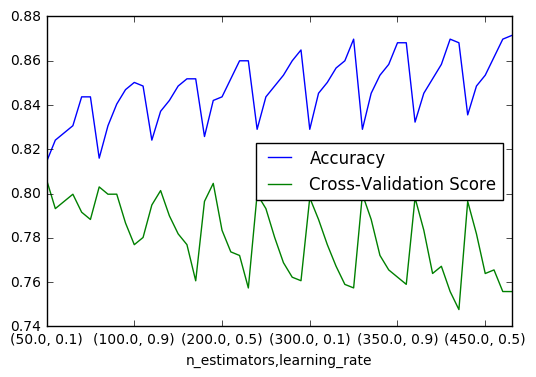

In [159]:
resultCalibrationDF.plot(x=['n_estimators', 'learning_rate'], y= ['Accuracy','Cross-Validation Score'], legend = True)

We can see that the more we increase the number of the estimators the more we get overfitting 

Lets choose the best combintion for the CV 50 estimators with learning_rate of 0.1

In [158]:
modelAdaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)
result = classification_model(modelAdaBoost, df,predictor_var,outcome_var)
print("Accuracy : %s" % "{0:.3%}".format(result['accuracy']))
print("Cross-Validation Score : %s" % "{0:.3%}".format(result['cv']))

Accuracy : 81.433%
Cross-Validation Score : 80.621%


## Prepare Test Data

(already done in submission 1) You must run submission 1 before.

## Predict Test Dataset

In [160]:
predictor_var = ['Gender','Married','Dependents','Education', 'Self_Employed', 'TotalIncome_log', 'LoanAmount_log', 'Property_Area','Credit_History_Unknown'] 
testVectorPrediction = modelAdaBoost.predict(testDF[predictor_var])
testVectorPrediction = datasetLe.inverse_transform(testVectorPrediction)
testDFPrediction = pd.DataFrame(testVectorPrediction, columns=['Loan_Status'], index=testDF['Loan_ID'].index)
finalResultsDF = pd.concat([testDF['Loan_ID'], testDFPrediction], axis=1)

In [161]:
#export to csv
finalResultsDF.to_csv(path_or_buf="./data/Submission2.csv", index=False)

## Link To Submission File
[Submission2-Link](https://github.com/zamiramos/ex4/blob/master/Submission2.csv)

## Leaderboard

![leaderboard](https://github.com/zamiramos/ex4/blob/master/Submission2.PNG)